In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
rc('font', **{'family': 'serif', 'serif': ['Cambria', 'Times New Roman']})

In [2]:
%load_ext watermark

In [3]:
%watermark -h -v -m -p pandas,numpy,matplotlib

CPython 3.5.2
IPython 4.0.3

pandas 0.17.1
numpy 1.10.4
matplotlib 1.5.1

compiler   : MSC v.1900 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 42 Stepping 7, GenuineIntel
CPU cores  : 8
interpreter: 64bit
host name  : user-PC


In [4]:
pd.options.display.max_rows = 8

In [5]:
h5root = '..\\h5 files\\'
chartdir = 'C:\\Users\\user\\Documents\\Agent-Based Models\\Charts\\'

In [132]:
h5subdir = 'TempTests\\'
h5file = 'smallcap_%d.h5' % 10

In [133]:
h5in = '%s%s%s' % (h5root, h5subdir, h5file)

In [134]:
indf = pd.read_hdf(h5in, 'orders')

### Cancels, Trades, Orders for Liquidity Providers

In [135]:
indf = indf.assign(trader_id = indf.order_id.str.split('_').str[0])
lp_df = indf.groupby(['trader_id','type']).quantity.count().unstack(level=-1)
lpsum_df = indf.groupby(['trader_id','type']).quantity.sum().unstack(level=-1)
lp_df, lpsum_df

(type          add  cancel
 trader_id                
 m0         499955  491258
 p0           6250    6224
 p1           9090    9050
 p10          4347    4319
 ...           ...     ...
 t6            680     NaN
 t7             20     NaN
 t8             19     NaN
 t9            751     NaN
 
 [97 rows x 2 columns], type          add  cancel
 trader_id                
 m0         499955  491258
 p0           6250    6224
 p1           9090    9050
 p10          4347    4319
 ...           ...     ...
 t6            680     NaN
 t7             20     NaN
 t8             19     NaN
 t9            751     NaN
 
 [97 rows x 2 columns])

In [136]:
lp_df[lp_df.index.str[0]=='p']['add'].describe(), lp_df[lp_df.index.str[0]=='p']['cancel'].describe()

(count        46.000000
 mean      13466.934783
 std       24690.971991
 min           2.000000
 25%        2667.500000
 50%        4173.500000
 75%       10000.000000
 max      100000.000000
 Name: add, dtype: float64, count       45.000000
 mean     13689.622222
 std      24744.102419
 min       1416.000000
 25%       2763.000000
 50%       4319.000000
 75%       9945.000000
 max      99437.000000
 Name: cancel, dtype: float64)

In [137]:
indf2 = pd.read_hdf(h5in, 'trades')
indf2 = indf2.assign(trader_id = indf2.resting_order_id.str.split('_').str[0])
lt_df = pd.DataFrame(indf2.groupby(['trader_id']).quantity.count())
lt_df.rename(columns={'quantity': 'trade'}, inplace=True)
ltsum_df = pd.DataFrame(indf2.groupby(['trader_id']).quantity.sum())
ltsum_df.rename(columns={'quantity': 'trade_vol'}, inplace=True)
lt_df, ltsum_df

(           trade
 trader_id       
 m0          8534
 p0            23
 p1            39
 p10           27
 ...          ...
 p6            13
 p7           123
 p8            16
 p9            14
 
 [46 rows x 1 columns],            trade_vol
 trader_id           
 m0              8534
 p0                23
 p1                39
 p10               27
 ...              ...
 p6                13
 p7               123
 p8                16
 p9                14
 
 [46 rows x 1 columns])

In [138]:
both_count = pd.merge(lp_df, lt_df, how='right', left_index=True, right_index=True)
both_count = both_count.assign(cancel_to_trade = both_count['cancel']/both_count['trade'],
                               cancel_pct = 100*both_count['cancel']/both_count['add'],
                               trade_pct = 100*both_count['trade']/both_count['add'])
both_count, both_count.cancel_pct.min(), both_count.cancel_pct.max(), both_count.cancel_to_trade.min(), \
both_count.cancel_to_trade.max()

(type          add  cancel  trade  cancel_pct  cancel_to_trade  trade_pct
 trader_id                                                               
 m0         499955  491258   8534   98.260443        57.564800   1.706954
 p0           6250    6224     23   99.584000       270.608696   0.368000
 p1           9090    9050     39   99.559956       232.051282   0.429043
 p10          4347    4319     27   99.355878       159.962963   0.621118
 ...           ...     ...    ...         ...              ...        ...
 p6           2777    2763     13   99.495859       212.538462   0.468131
 p7          25000   24870    123   99.480000       202.195122   0.492000
 p8           3703    3686     16   99.540913       230.375000   0.432082
 p9           2222    2207     14   99.324932       157.642857   0.630063
 
 [46 rows x 6 columns],
 98.260443439909594,
 99.705882352941174,
 57.564799625029295,
 362.39999999999998)

In [139]:
both_sum = pd.merge(lpsum_df, ltsum_df, how='right', left_index=True, right_index=True)
both_sum = both_sum.assign(trade_order_vol_pct = 100*both_sum['trade_vol']/both_sum['add'],
                           cancel_order_vol_pct = 100*both_sum['cancel']/both_sum['add'],
                           cancel_trade_vol = both_sum['cancel']/both_sum['trade_vol']
                          )
both_sum, both_sum.cancel_order_vol_pct.min(), both_sum.cancel_order_vol_pct.max(), both_sum.cancel_trade_vol.min(), \
both_sum.cancel_trade_vol.max()

(type          add  cancel  trade_vol  cancel_order_vol_pct  cancel_trade_vol  \
 trader_id                                                                      
 m0         499955  491258       8534             98.260443         57.564800   
 p0           6250    6224         23             99.584000        270.608696   
 p1           9090    9050         39             99.559956        232.051282   
 p10          4347    4319         27             99.355878        159.962963   
 ...           ...     ...        ...                   ...               ...   
 p6           2777    2763         13             99.495859        212.538462   
 p7          25000   24870        123             99.480000        202.195122   
 p8           3703    3686         16             99.540913        230.375000   
 p9           2222    2207         14             99.324932        157.642857   
 
 type       trade_order_vol_pct  
 trader_id                       
 m0                    1.706954  
 p0  

### Durations

In [140]:
add = indf[indf['type']=='add'][['trader_id','order_id', 'timestamp']]
add.rename(columns={'timestamp': 'add_time'}, inplace=True)
cancel = indf[indf['type']=='cancel'][['trader_id','order_id', 'timestamp']]
cancel.rename(columns={'timestamp': 'cancel_time'}, inplace=True)
cancel

,trader_id,order_id,cancel_time
62,p21,p21_2,11
85,p38,p38_3,13
87,p23,p23_2,14
104,m0,m0_10,15
...,...,...,...
44722,m0,m0_499850,100000
44725,p29,p29_99988,100000
44732,p42,p42_3571,100000
44735,p38,p38_99991,100000


In [141]:
add_cancel = pd.merge(add, cancel, left_on='order_id', right_on='order_id')
add_cancel = add_cancel.assign(cancel_duration = add_cancel['cancel_time']-add_cancel['add_time'])
add_cancel

,trader_id_x,order_id,add_time,trader_id_y,cancel_time,cancel_duration
0,p38,p38_1,1,p38,26,25
1,p29,p29_1,1,p29,24,23
2,p21,p21_1,1,p21,26,25
3,p29,p29_2,2,p29,39,37
...,...,...,...,...,...,...
1107287,m0,m0_499933,99996,m0,100000,4
1107288,m0,m0_499934,99996,m0,99999,3
1107289,m0,m0_499944,99998,m0,100000,2
1107290,m0,m0_499945,99998,m0,99998,0


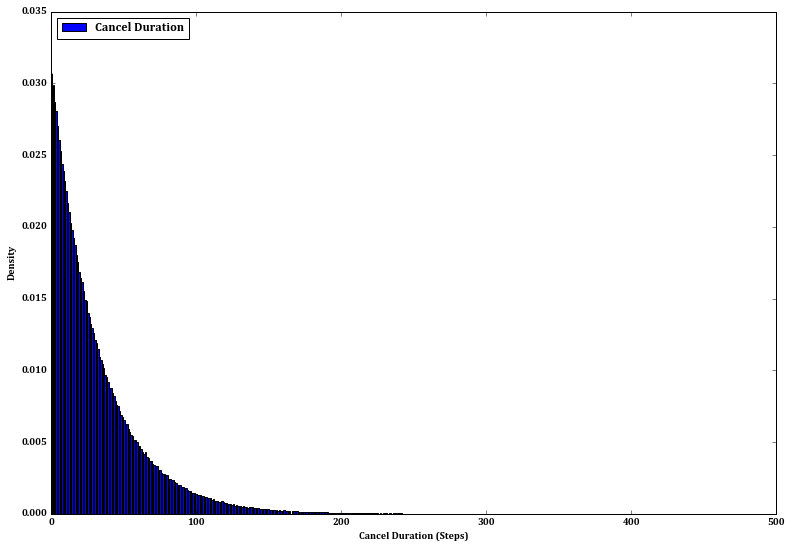

In [142]:
fig = plt.figure(figsize=(13,9), dpi=300, facecolor='w')
ax1 = fig.add_subplot(111)
ax1.hist(add_cancel.cancel_duration, bins=500, normed=True, label='Cancel Duration')
ax1.set_xlim(0, 500)
ax1.set_xlabel('Cancel Duration (Steps)', family='Cambria')
ax1.set_ylabel('Density', family='Cambria')
ax1.legend(loc='upper left')
fig.savefig('%scanceldur.png' % chartdir)
plt.show()

In [143]:
add_trade = pd.merge(add, indf2, left_on='order_id', right_on='resting_order_id')
add_trade = add_trade.assign(trade_duration = add_trade['timestamp']-add_trade['add_time'])
add_trade

,trader_id_x,order_id,add_time,incoming_order_id,price,quantity,resting_order_id,resting_timestamp,side,timestamp,trader_id_y,trade_duration
0,m0,m0_66,23,t33_1,999520,1,m0_66,23,buy,46,m0,23
1,p4,p4_2,36,t24_1,999521,1,p4_2,36,buy,85,p4,49
2,m0,m0_157,41,t6_1,999518,1,m0_157,41,sell,147,m0,106
3,m0,m0_164,42,t33_2,999521,1,m0_164,42,buy,92,m0,50
...,...,...,...,...,...,...,...,...,...,...,...,...
11759,p42,p42_3569,99932,t6_680,999554,1,p42_3569,99932,sell,99960,p42,28
11760,m0,m0_499619,99933,t43_193,999557,1,m0_499619,99933,buy,99974,m0,41
11761,p29,p29_99956,99956,t40_46,999555,1,p29_99956,99956,sell,99958,p29,2
11762,p10,p10_4346,99958,t24_1176,999554,1,p10_4346,99958,sell,99960,p10,2


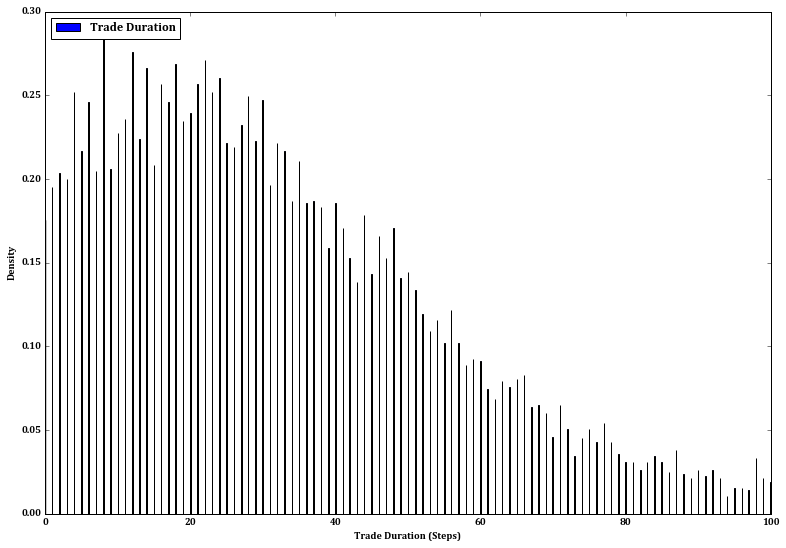

In [144]:
fig = plt.figure(figsize=(13,9), dpi=300, facecolor='w')
ax1 = fig.add_subplot(111)
ax1.hist(add_trade.trade_duration, bins=5000, normed=True, label='Trade Duration')
ax1.set_xlim(0, 100)
ax1.set_xlabel('Trade Duration (Steps)', family='Cambria')
ax1.set_ylabel('Density', family='Cambria')
ax1.legend(loc='upper left')
fig.savefig('%stradedur.png' % chartdir)
plt.show()

In [145]:
add_trade.trade_duration.describe(), add_cancel.cancel_duration.describe()

(count    11763.000000
 mean        34.988778
 std         27.786330
 min          0.000000
 25%         15.000000
 50%         29.000000
 75%         48.000000
 max        359.000000
 Name: trade_duration, dtype: float64, count    1107291.000000
 mean          31.963175
 std           32.519251
 min            0.000000
 25%            9.000000
 50%           22.000000
 75%           44.000000
 max          497.000000
 Name: cancel_duration, dtype: float64)